In [1]:
import pandas as pd
import numpy as np
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord

In [9]:
df = pd.read_csv('catalog.csv')[1:].reset_index(drop=True)
df = df.groupby(['Target Name']).first()

In [10]:
cs = [SkyCoord(*np.asarray(df[['RA (J2000)', 'Dec (J2000)']].iloc[idx]), unit=('hourangle', 'deg')) for idx in range(len(df))]

In [28]:
names = ['2MASS-J19432996+5059289',
'CD-38-15670',
'CD-50-714',
'EPIC-2037B',
'G191B2B',
'GJ-3053',
'WASP-62',
'WASP-74',
'WASP-77A',
'XO-2',
'V-AU-MIC-1',
'USCO-161014.75-191909.3',
'TOI674',
#'TOI270',
#'HD 37962',
'LTT-1445A',
'LHS-6343',
'L-248-27',
'HAT-P-2', 'HAT-P-7',
       'HAT-P-70B', 'HATS-7', 'HD-116405', 'HD-134004', 'HD-15082',
       'HD-165459', 'HD-185603B', 'HD-195689', 'HD-205905', 'HD-219666',
       'HD-27836', 'HD-37725', 'HD-38949', 'HD-60753', 'HD-93521', 'HIP-41378',
       'HIP41378', 'HR-7018', 'K2-3', 'KELT-1', 'KELT-7', 'KEPLER-138',
       'KEPLER-16', 'KEPLER-79']

In [29]:
np.asarray(names)[~np.in1d(names, list(df.index))]

array([], dtype='<U23')

In [33]:
oknames = np.asarray(names)[np.asarray(df[np.in1d(list(df.index), names)]['Proposal ID'], int) < 16000]

In [35]:
import ombre as om
import os
import shutil
from glob import glob

In [36]:
for name in oknames:
    if not os.path.isdir(f'/Volumes/Nibelheim/hst/data/{name}'):
        os.mkdir(f'/Volumes/Nibelheim/hst/data/{name}')
    fnames = glob(f'/Volumes/Nibelheim/hst/data/{name}/*')
    print(name, len(fnames))

2MASS-J19432996+5059289 343
CD-50-714 212
EPIC-2037B 188
G191B2B 61
GJ-3053 0
WASP-74 0
XO-2 0
V-AU-MIC-1 0
TOI674 0
LTT-1445A 0
L-248-27 0
HAT-P-2 279
HAT-P-7 880
HAT-P-70B 71
HATS-7 80
HD-116405 7
HD-134004 150
HD-15082 66
HD-165459 494
HD-195689 0
HD-205905 0
HD-219666 0
HD-27836 13
HD-37725 8
HD-38949 2
HD-60753 2
HIP-41378 364
HR-7018 6
K2-3 0
KELT-1 0
KELT-7 0
KEPLER-138 0
KEPLER-79 0


In [ ]:
%%capture --no-stderr
for name in oknames:
    paths = om.query.download_target(name, download_dir='/Volumes/Nibelheim/hst/ombre-cache/')
    [shutil.move(p, f'/Volumes/Nibelheim/hst/data/{name}') for p in paths]

In [89]:
planets = [d[0].lower().replace('#', '').replace('_', '').replace('-', '').replace(' ', '') for d in np.asarray(pd.read_csv('planet_names.txt'))]

In [99]:
sources = [d.lower().replace('#', '').replace('_', '').replace('-', '').replace(' ', '') for d in list(df.index)]

In [163]:
Simbad.query_region(np.asarray(cs)[~np.in1d(sources, planets)][19])

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
HATS-7,13 55 25.6669,-21 12 27.722,14,14,0.026,0.019,90,A,O,2018yCat.1345....0G,1
HATS-7b,13 55 25.6669,-21 12 27.722,14,14,0.026,0.019,90,A,O,2018yCat.1345....0G,1
Gaia DR2 6288856836117001088,13 55 20.4472,-21 13 57.946,14,14,0.978,0.882,90,A,O,2018yCat.1345....0G,1


In [22]:
np.unique(df['Target Name'])

array(['180227', '2MASS-J00041112-4721382', '2MASS-J16371556+0711000',
       '2MASS-J19432996+5059289', '2MASS-J23062928-0502285',
       '2MASS-J23122061+1046340', '55-CANCRI', '55-CNC', 'BD-02-5958',
       'CD-38-15670', 'CD-50-714', 'EPIC-2037B', 'EPIC201912552',
       'G191B2B', 'GJ-1214', 'GJ-1214-FEB2018', 'GJ-3053', 'GJ-3470',
       'GJ-9827', 'GJ1214', 'GJ436', 'GSC-04980-00761', 'HAT-1C',
       'HAT-P-11', 'HAT-P-12', 'HAT-P-17', 'HAT-P-18', 'HAT-P-2',
       'HAT-P-26', 'HAT-P-3', 'HAT-P-32', 'HAT-P-38', 'HAT-P-41',
       'HAT-P-7', 'HAT-P-70B', 'HATS-7', 'HD-106315', 'HD-116405',
       'HD-134004', 'HD-149026', 'HD-15082', 'HD-165459', 'HD-185603B',
       'HD-195689', 'HD-205905', 'HD-209458', 'HD-219666', 'HD-27836',
       'HD-3167', 'HD-37725', 'HD-38949', 'HD-60753', 'HD-93396',
       'HD-93521', 'HD-97658', 'HD189733', 'HD209458', 'HIP-41378',
       'HIP41378', 'HR-7018', 'K2-18', 'K2-3', 'KELT-1', 'KELT-7',
       'KEPLER-138', 'KEPLER-16', 'KEPLER-79', 'L-24

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt

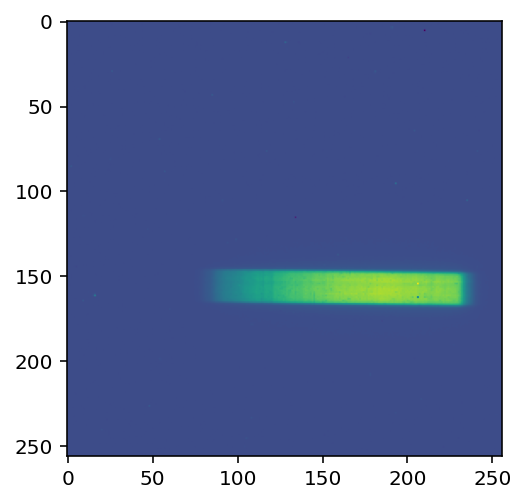

In [38]:
plt.imshow(fits.open('/Volumes/Nibelheim/hst/data/WASP-96/idt051hgq_flt.fits')[1].data)